In [1]:
import matplotlib
import os
import json
# !pip install neuron
# !pip install netpyne 

In [2]:
%matplotlib inline

In [3]:
!nrnivmodl

/usr/bin/xcrun
/Users/sherryzhou/Desktop/netpyne2022/netpyne/netpyne/tts/nc2021
Mod files: "./ichanR859C1.mod" "./ichanWT2005.mod" "./izhi2007b.mod"

 -> Compiling mod_func.cpp
 => LINKING shared library ./libnrnmech.dylib
Successfully created x86_64/special


In [4]:
if os.path.isdir('/content/cells_netpyne2021'):
  !rm -r /content/cells_netpyne2021

In [5]:
###### Stimulation Code
### 4 populations 
from netpyne import specs, sim
netParams = specs.NetParams() 
simConfig = specs.SimConfig()

In [6]:
# Pyramidal - cortical
PYRcell = {'secs': {}} 
PYRcell['secs']['soma'] = {'geom': {}, 'mechs': {}} 
PYRcell['secs']['soma']['geom'] = {'diam': 18.8, 'L': 18.8, 'Ra': 123.0}
PYRcell['secs']['soma']['mechs']['hh'] = {'gnabar': 0.12, 'gkbar': 0.036, 'gl': 0.003, 'el': -70} 
PYRcell['secs']['soma']['vinit'] = -100 # initial membrane potential
netParams.cellParams['PYR'] = PYRcell

In [7]:
# Inhibitory - cortical
Icell = {'secs': {}}
Icell['secs']['soma'] = {'geom': {}, 'mechs': {}}                                              
Icell['secs']['soma']['geom'] = {'diam': 10.0, 'L': 9.0, 'Ra': 110.0}                           
Icell['secs']['soma']['mechs']['hh'] = {'gnabar': 0.12, 'gkbar': 0.036, 'gl': 0.003, 'el': -70} 
netParams.cellParams['I'] = Icell

In [8]:
# Reticular nucleus - thalamic
REcell = {'secs': {}} 
REcell['secs']['soma'] = {'geom': {}, 'mechs': {}}
REcell['secs']['soma']['geom'] = {'diam': 18.8, 'L': 18.8, 'Ra': 123.0}
REcell['secs']['soma']['mechs']['hh'] = {'gnabar': 0.12, 'gkbar': 0.036, 'gl': 0.003, 'el': -70}
REcell['secs']['dend'] = {'geom': {}, 'topol': {}, 'mechs': {}} 
REcell['secs']['dend']['geom'] = {'diam': 5.0, 'L': 150.0, 'Ra': 150.0, 'cm': 1}
REcell['secs']['dend']['topol'] = {'parentSec': 'soma', 'parentX': 0, 'childX': 0}
REcell['secs']['dend']['mechs']['pas'] = {'g': 0.0000357, 'e': -70}
netParams.cellParams['RE'] = REcell

In [9]:
# # Thalamocortical - thalamic
TCcell = {'secs': {}} 
TCcell['secs']['soma'] = {'geom': {}, 'topol': {}, 'mechs': {}} 
TCcell['secs']['soma']['geom'] = {'diam': 18.8, 'L': 18.8, 'Ra': 123.0} 
TCcell['secs']['soma']['mechs']['hh'] = {'gnabar': 0.12, 'gkbar': 0.036, 'gl': 0.003, 'el': -70}                                  
TCcell['secs']['dend'] = {'geom': {}, 'mechs': {}} 
TCcell['secs']['dend']['geom'] = {'diam': 18.8, 'L': 18.8, 'Ra': 123.0} 
TCcell['secs']['dend']['topol'] = {'parentSec': 'soma', 'parentX': 0, 'childX': 0}
TCcell['secs']['dend']['mechs']['pas'] = {'g': 0.0000357, 'e': -70}
netParams.cellParams['TC'] = TCcell

In [10]:
netParams.popParams['PY'] = {'cellType': 'PYR', 'numCells': 120}
netParams.popParams['IN'] = {'cellType': 'I', 'numCells': 120}
netParams.popParams['RE'] = {'cellType': 'RE', 'numCells': 120}
netParams.popParams['TC'] = {'cellType': 'TC', 'numCells': 120}

In [11]:
netParams.synMechParams['AMPA'] = {'mod': 'Exp2Syn', 'tau1': 0.1, 'tau2': 1.0, 'e': 0} # 100% gabaA
netParams.synMechParams['GABAA'] = {'mod': 'Exp2Syn', 'tau1': 0.3, 'tau2': 4.25, 'e': -75} # 50% gabaB
netParams.synMechParams['GABAB'] = {'mod': 'Exp2Syn', 'tau1': 0.1, 'tau2': 10, 'e': 75}

In [12]:
netParams.stimSourceParams['bkg'] = {'type': 'NetStim', 'rate': 1, 'noise': 1, 'start': 1}
netParams.stimTargetParams['bkg->PYR1'] = {'source': 'bkg', 'conds': {'pop': ['PY']}, 'weight': 0.8, 'delay': 'uniform(1,5)'}

In [13]:
netParams.connParams['PY->IN'] = {   
        'preConds': {'pop': 'PY'},
        'postConds': {'pop': 'IN'},
        'sec': 'dend',                
        'synMech': 'AMPA',             
        'weight': 0.1,               
        'delay': 5,                   
        'probability': 0.25}  

netParams.connParams['PY->PY'] = {   
        'preConds': {'pop': 'PY'},
        'postConds': {'pop': 'PY'},
        'sec': 'dend',                 
        'synMech': 'AMPA',             
        'weight': 0.1,               
        'delay': 5,                    
        'probability': 0.25} 

netParams.connParams['PY->RE'] = {    
        'preConds': {'pop': 'PY'},
        'postConds': {'pop': 'RE'},
        'sec': 'dend',                 
        'synMech': 'AMPA',             
        'weight': 0.1,                
        'delay': 5,                   
        'probability': 0.25} 

netParams.connParams['PY->TC'] = {    
        'preConds': {'pop': 'PY'},
        'postConds': {'pop': 'TC'},
        'sec': 'dend',                 
        'synMech': 'AMPA',           
        'weight': 0.1,                
        'delay': 5,                 
        'probability': 0.25} 

netParams.connParams['RE->TC'] = {    
        'preConds': {'pop': 'RE'},
        'postConds': {'pop': 'TC'},
        'sec': 'dend',                 
        'synMech': 'GABAA', 
        'weight': 0.1,                
        'delay': 5,                   
        'probability': 0.25} 

netParams.connParams['RE->RE'] = {    
        'preConds': {'pop': 'RE'},
        'postConds': {'pop': 'RE'},
        'sec': 'dend',                 
        'synMech': 'GABAB', 
        'weight': 0.1,                
        'delay': 5,                   
        'probability': 0.25} 

netParams.connParams['TC->RE'] = {    
        'preConds': {'pop': 'TC'},
        'postConds': {'pop': 'RE'},
        'sec': 'dend',                 
        'synMech': 'AMPA',            
        'weight': 0.1,                
        'delay': 5,                  
        'probability': 0.25} 

netParams.connParams['TC->PY'] = {    
        'preConds': {'pop': 'TC'},
        'postConds': {'pop': 'PY'},
        'sec': 'dend',                 
        'synMech': 'AMPA',            
        'weight': 0.1,                
        'delay': 5,                   
        'probability': 0.25} 


Start time:  2022-12-11 23:42:17.873074

Creating network of 4 cell populations on 1 hosts...
  Number of cells on node 0: 480 
  Done; cell creation time = 0.07 s.
Making connections...
  Number of connections on node 0: 28623 
  Done; cell connection time = 1.70 s.
Adding stims...
  Number of stims on node 0: 120 
  Done; cell stims creation time = 0.01 s.
Recording 480 traces of 1 types on node 0

Running simulation using NEURON for 4000.0 ms...
  Done; run time = 110.81 s; real-time ratio: 0.04.

Gathering data...
  Done; gather time = 0.73 s.

Analyzing...
  Cells: 480
  Connections: 28743 (59.88 per cell)
  Spikes: 30803 (16.04 Hz)
  Simulated time: 4.0 s; 1 workers
  Run time: 110.81 s
Saving output as HHTut_data.json ... 
Finished saving!
  Done; saving time = 0.73 s.
Preparing spike data...
Saving data as HHTut_spike_data.pkl ... 
Plotting raster...
Saving data as HHTut_data.pkl ... 
Plotting firing rate power spectral density (PSD) ...


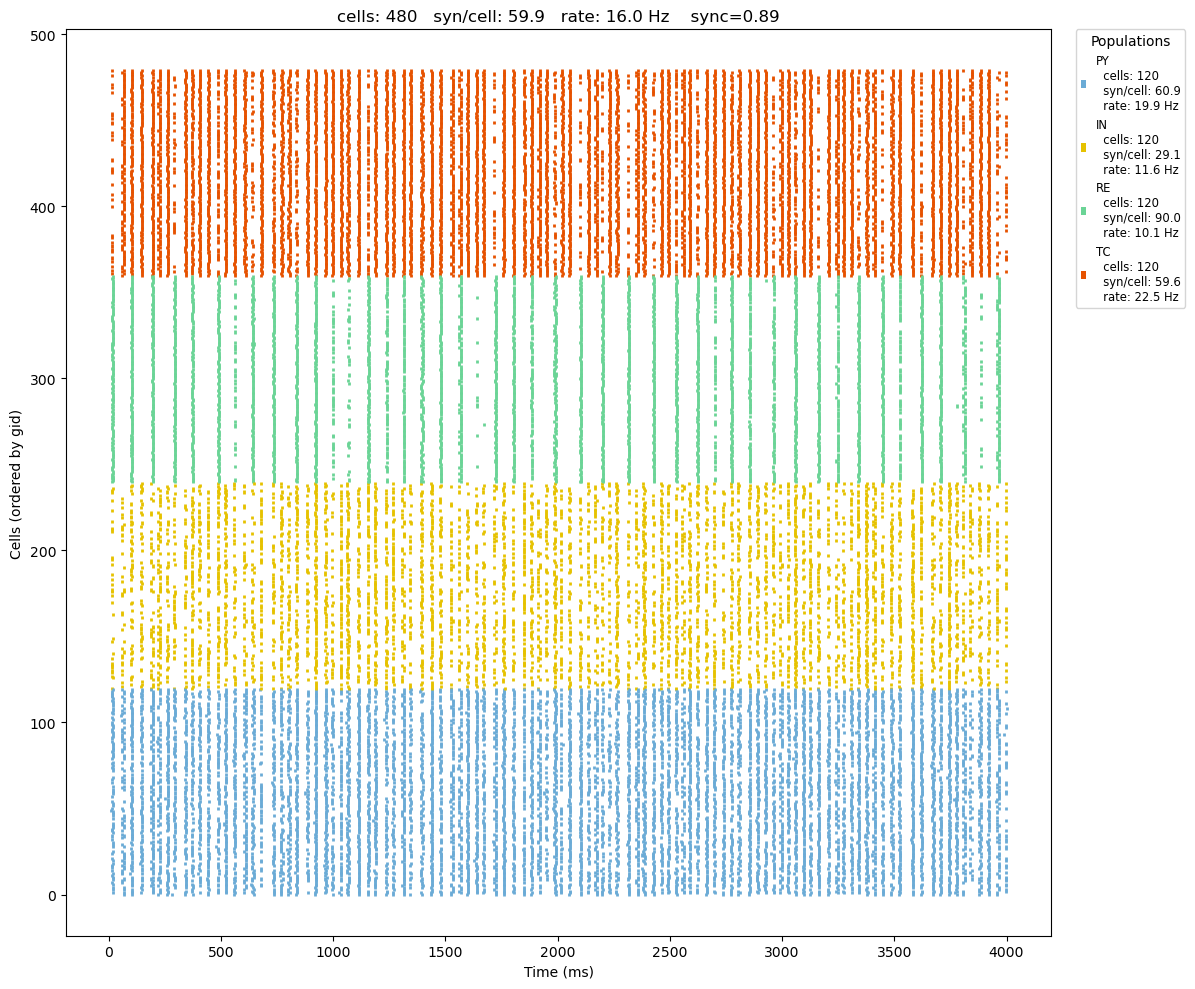

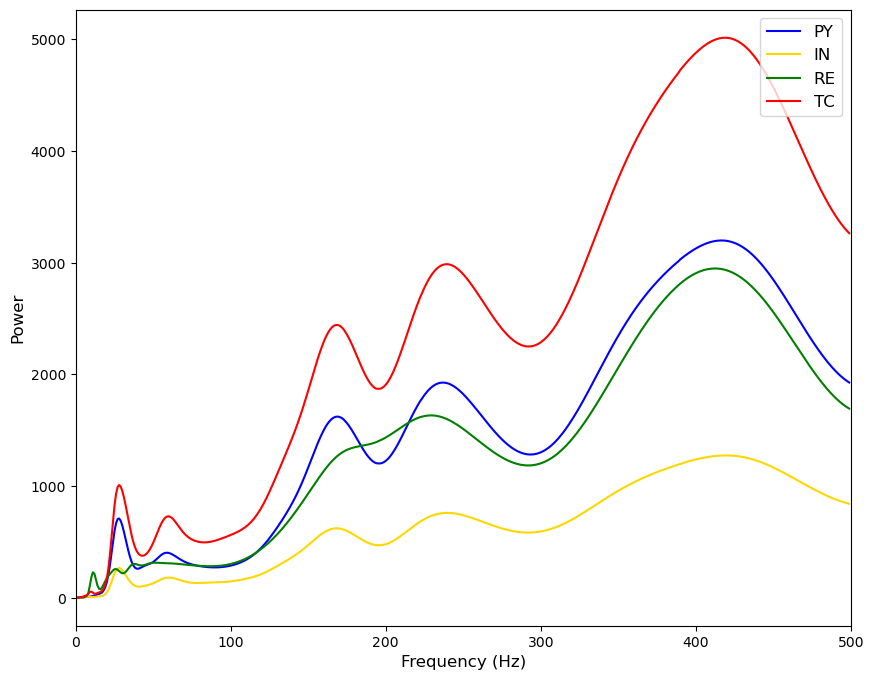

  Done; plotting time = 1.80 s

Total time = 115.87 s


In [14]:
simConfig.duration = 4*1e3
simConfig.dt = 0.025 
simConfig.seeds = {'conn': 1, 'stim': 1, 'loc': 1} 
simConfig.verbose = False 
simConfig.hParams = {'v_init': PYRcell['secs']['soma']['vinit']}

# Recording
simConfig.recordCells = [] 
simConfig.recordTraces = {'Vsoma': {'sec': 'soma','loc': 0.5,'var': 'v'}}
simConfig.recordStim = True 
simConfig.recordStep = 0.1 

# Saving
simConfig.filename = 'HHTut' 
simConfig.saveFileStep = 1000 
simConfig.savePickle = False 
simConfig.saveJson = True

# Analysis and plotting
simConfig.analysis['plotRaster'] = {'saveData': 'raster_data.json', 'saveFig': True, 'showFig': True, 'figSize':(12, 10)} # Plot raster
simConfig.analysis['plotRatePSD'] = {'include': ['PY', 'IN', 'RE', 'TC'],'maxFreq':500,  'popColors': {'PY':'blue', 'IN': 'gold', 'RE':'green', 'TC': 'red'}, 'showFig': True} # Plot FFT2
# simConfig.analysis['plotTraces'] = {'include': [2], 'saveFig': True, 'showFig': True} # Plot cell traces
# simConfig.analysis ['plot2Dnet'] = {'saveData': True,'saveFig': True, 'showFig': True} # Plot 2D cells and connections
sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig)